In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal
from math import log, exp
from scipy.special import logsumexp

In [2]:
données = datasets.load_iris()
X = données.data
y = données.target

# Algorithme Kmeans

In [3]:
#initialisation Kmeans++
def kmeans_plusplus(X, k):
    
    '''
    inputs :
    - X les données
    - k le nb de clusters
    
    outputs : 
    -mu les centroïdes
    '''
    
    n, d = X.shape
    #Initialisation
    #les centroïdes
    mu = np.zeros((k, d))
    mu[0] = X[np.random.choice(range(X.shape[0]))]

    
    #les distances
    D = np.zeros(X.shape[0])
    
    for l in range(1, k):
        for i in range(X.shape[0]):
            dist = min(np.linalg.norm(X[i] - mu[0:l], axis = 1)**2) #renvoie leminimum ||Xi - Ci||^2 à Xi fixé
            D[i] = dist                                             #calcule la distance de Xi de plus proche centre
            
        D = D / D.sum()                                     #on crée la probabilité de distribution
        mu[l] = X[np.random.choice(range(X.shape[0]), 1, p=D)]
     
    return(mu)



#Algorithme des Kmeans
def kmeans(X, k, nitermax = 100, eps = .01):
    
    '''
    inputs:
    -X les données
    - k le nb de clusters
    ouputs:
    -c les centroïdes
    -z les labels
    '''
    
    n, d = X.shape
    #initialisation 
    c = kmeans_plusplus(X,k)    #les centres
    z = np.zeros(n)            #initialisation des z au hasard
    distorsion = [np.sum(np.array([np.linalg.norm(X[z == l] - c[l])**2 for l in range(k)]))]  #calcul initial de la distorsion
    
    #algorithme
    for l in range(nitermax):
        D = np.zeros((n, k))   #matrice des distances
        
        for i in range(n):
            D[i] = np.linalg.norm(X[i] - c[0:k], axis=1)**2
            
        z = np.argmin(D, axis=1)                                        #index des clusters des variables xi
        
        c = np.array([np.mean(X[z == u], axis = 0) for u in range(k)])  #nouveaux centres

        distorsion.append(np.sum(np.min(D, axis = 1)))                  #calcul de la distorsion
        
        #critère de convergence
        if np.abs(distorsion[l+1] - distorsion[l]) < eps :
            #print("l'algorithme a convergé en", l, "itérations")
            return(c, z)
        

    print("l'algorithme n'a pas convergé")
    return(c, z)

## Plot les Kmeans

In [4]:
#plot kmeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

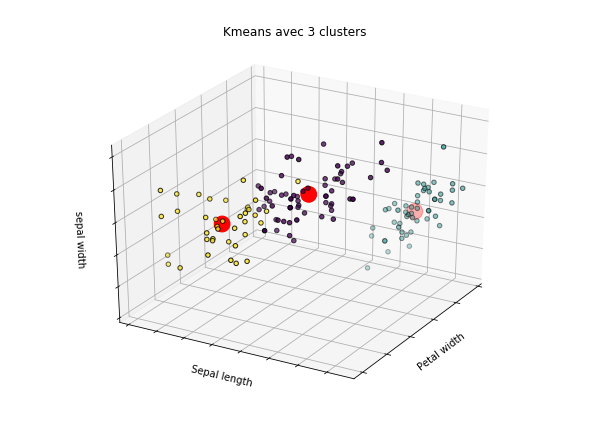

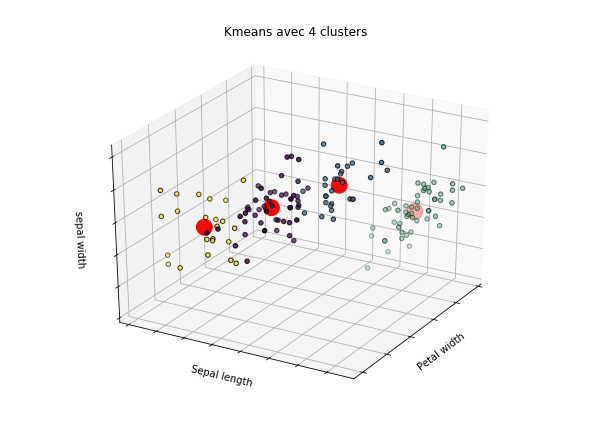

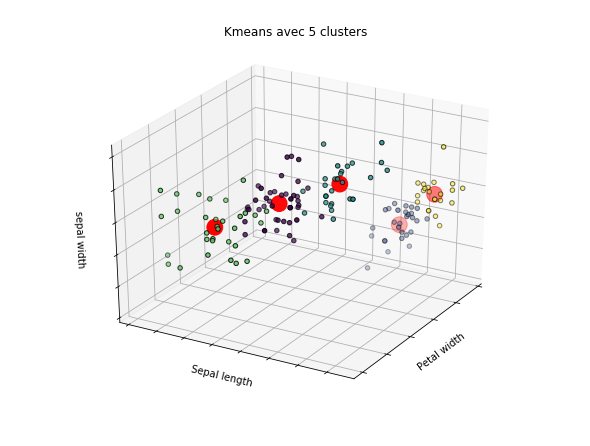

In [5]:
#plot 3D pour voir les cluster
fignum = 1
titles = ['Kmeans avec 3 clusters', 'Kmeans avec 4 clusters', 'Kmeans avec 5 clusters']
for i in range(3,6):
    centres, label = kmeans(X, i)
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=150)
    ax.scatter(X[:, 3], X[:, 0], X[:, 1], c=label.astype(np.float), edgecolor='k')
    ax.scatter(centres[:, 3], centres[:, 0], centres[:, 1], s = 250, marker='o', c='red', label='centroids')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('sepal width')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
    

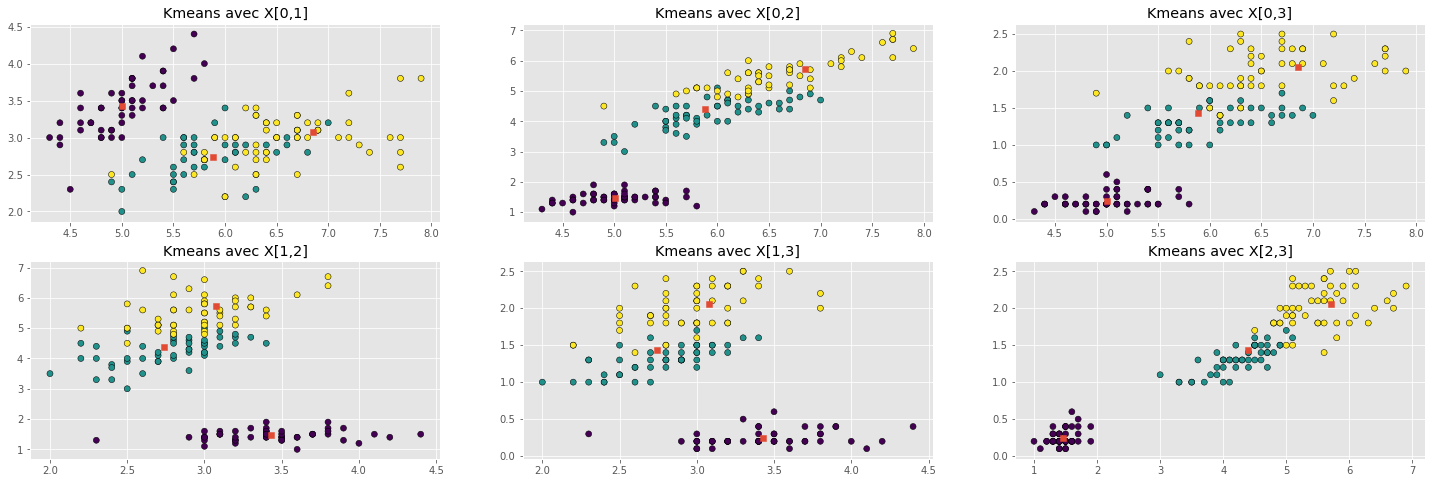

In [7]:
#nb de classes
t = 3

#sortie des kmeans
mu, labels = kmeans(X, t)
fig = plt.figure(figsize = (25,8))

#pointeurs pour les plots
i=0
j=1

#titres
titles = ['Kmeans avec X[0,1]', 'Kmeans avec X[0,2]', 'Kmeans avec X[0,3]',  'Kmeans avec X[1,2]', 'Kmeans avec X[1,3]', 'Kmeans avec X[2,3]']
plt.style.use('ggplot')
for k in range(6):

    bg = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1

    # Plot also the training points
    bg.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    bg.scatter(mu[:,i], mu[:,j], marker = 's')
    
    bg.set_title(titles[k])


    j +=1
    

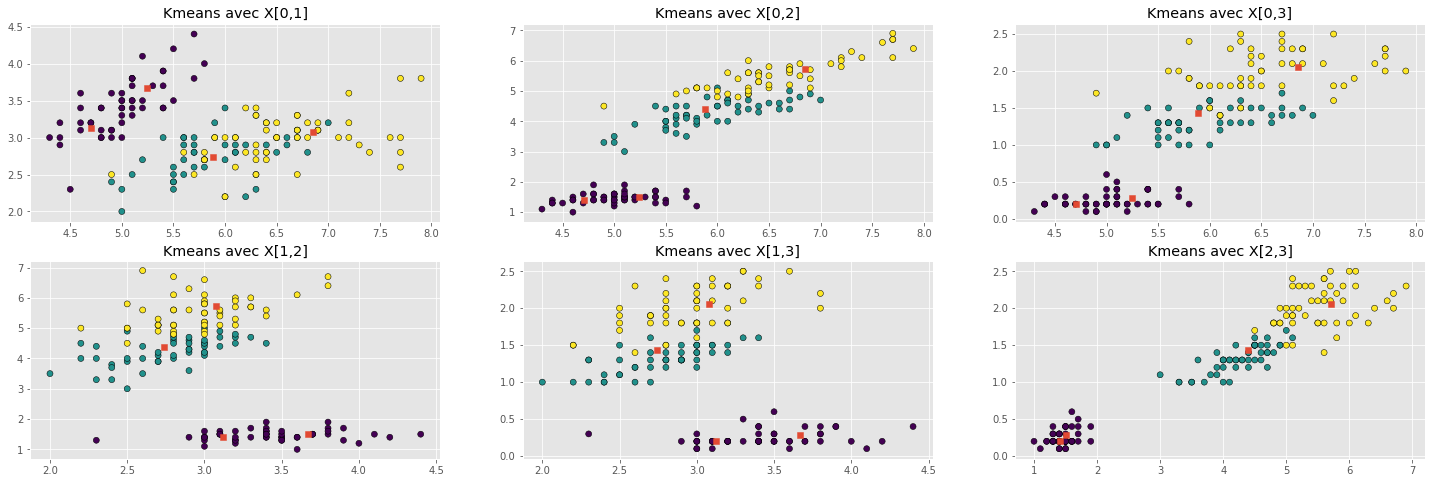

In [8]:
#nb de classes
t = 4

#sortie des kmeans
mu, labels = kmeans(X, t)
fig = plt.figure(figsize = (25,8))

#pointeurs pour les plots
i=0
j=1

#titres
titles = ['Kmeans avec X[0,1]', 'Kmeans avec X[0,2]', 'Kmeans avec X[0,3]',  'Kmeans avec X[1,2]', 'Kmeans avec X[1,3]', 'Kmeans avec X[2,3]']
plt.style.use('ggplot')
for k in range(6):

    bg = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1


    # Plot also the training points
    bg.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    bg.scatter(mu[:,i], mu[:,j], marker = 's')
    
    bg.set_title(titles[k])


    j +=1

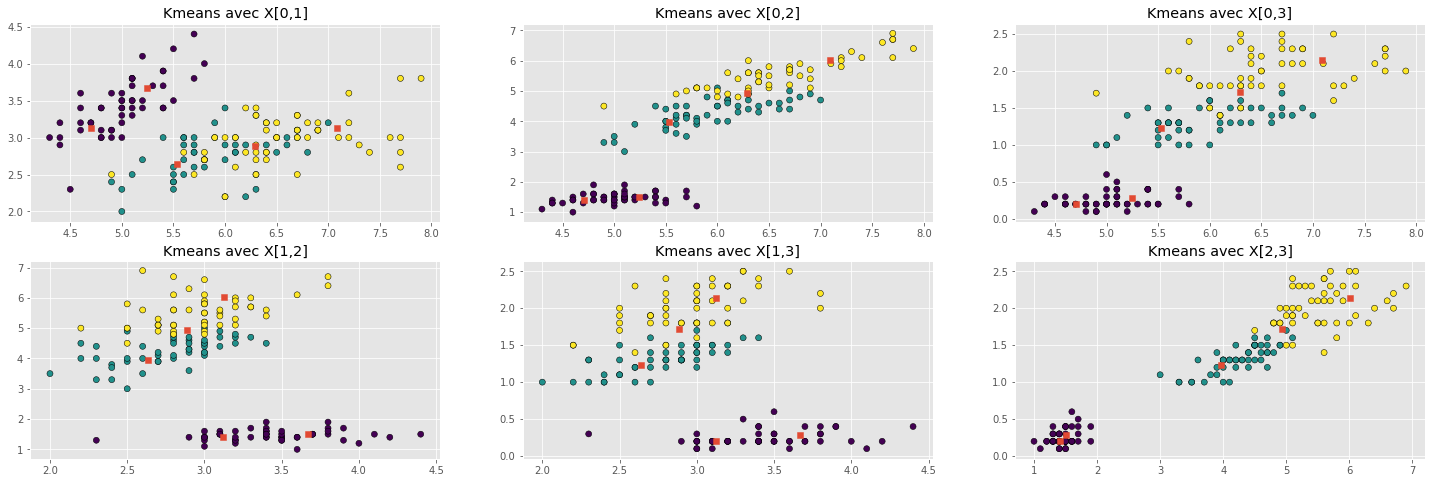

In [9]:
#nb de classes
t = 5

#sortie des kmeans
mu, labels = kmeans(X, t)
fig = plt.figure(figsize = (25,8))

#pointeurs pour les plots
i=0
j=1

#titres
titles = ['Kmeans avec X[0,1]', 'Kmeans avec X[0,2]', 'Kmeans avec X[0,3]',  'Kmeans avec X[1,2]', 'Kmeans avec X[1,3]', 'Kmeans avec X[2,3]']
plt.style.use('ggplot')
for k in range(6):

    bg = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1
 

    # Plot also the training points
    bg.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    bg.scatter(mu[:,i], mu[:,j], marker = 's')
    
    bg.set_title(titles[k])


    j +=1

# Algorithme EM, covariance full

In [10]:
def EM(X, k, eps = 0.01, niter = 100) :
    '''
    Inputs:
    - X les données
    - k le nb de clusters
    
    Outputs : 
    - mu0 : liste d'array représentant les centroïdes
    - sigma0 : listes des matrices de covariance
    - p0 : liste des probas des variables latentes
    - labels : label des données
    '''
    
    n, d = X.shape
    ###initialisation
    mu0, z = kmeans(X, k)                                #on initialise mu avec ce qu'a trouvé l'algorithme des Kmeans
    
    p0 = np.array([len(z[z == i])/n for i in range(k)])  #pk = (nb de données appartenant au cluster k) / (nb de données totale)
    
    #a ce stade, sachant les données, nous connaissons l'assignations des données aux clusters. Donc les probabs valent soient 0 ou 1
    #trouver une meilleure réécriture
    sigma0 =[]
    for l in range(k):
        a = (X[z == l] - mu0[l])
        somme = 0
        for i in range(a.shape[0]):
            matrice = a[i].reshape(d,1)
            itération = matrice.dot(matrice.T)
            somme += itération
        final = somme / len(z[z==l])
        sigma0.append(final)

    #loglikelyhood
    numerateur = np.array([p0[l] * multivariate_normal(mu0[l],sigma0[l]).pdf(X) for l in range(k)])
    logold = np.sum(np.log(np.sum(numerateur, axis = 0)))
    
    for i in range(niter):
        
        ###E-step
        
        #tau
        denominateur = np.sum(numerateur, axis = 0)
        tau = denominateur**(-1) * numerateur
        
        
        ###M-step
        
        #somme sur n des tau_{ik}
        Nl = np.sum(tau, axis = 1)
        
        #nouvelles moyennes
        mu0 = np.array([(tau[l].dot(X))/Nl[l] for l in range(k)])
        
        #nouvelles matrice de covariances 
        sigma0 = []
        for l in range(k):
            a = X - mu0[l]
            somme = 0
            for j in range(a.shape[0]):
                matrice = a[j].reshape(d,1)
                iteration = tau[l,j]* matrice.dot(matrice.T)
                somme += iteration
            sigma0.append(somme/Nl[l])
        
        #nouvelles probas des variables latentes
        p0 = Nl / n
        
        #évaluation
        numerateur = np.array([p0[l]*multivariate_normal(mu0[l],sigma0[l]).pdf(X) for l in range(k)])
        lognew = np.sum(np.log(np.sum(numerateur, axis = 0)))
        
        if np.abs(lognew - logold) < eps : 
            #prédire le label le plus probable pour chaque donnée
            labels = np.argmax(tau, axis = 0)
            
            #print("l'algorithme a convergé en", i, "itérations")
            return(mu0, sigma0, p0, labels)
        
        else : 
            logold = lognew
            
    #prédire le label le plus probable pour chaque donnée
    labels = np.argmax(tau, axis = 0)
    
    print("l'algorithme n'a pas convergé")
    return(mu0, sigma0, p0, labels)

## Plot EM 

In [11]:
#Plot EM
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
#adapté d'un site
def make_ellipsesbis(coord1, coord2, mu, sigma, cluster, ax):
    for n, col in enumerate(cluster):
        
        covariances = np.array([[sigma[n][i,i], sigma[n][i,j]], [sigma[n][j,i], sigma[n][j,j]]])
        centroïde = np.array([ mu[n][i], mu[n][j] ])

        v, w = np.linalg.eigh(covariances)
        u = w[0]
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(centroïde, v[0], v[1],
                                  angle, color=col)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.2)
        #ax.set_aspect('equal', 'datalim')
        ax.add_patch(ell)

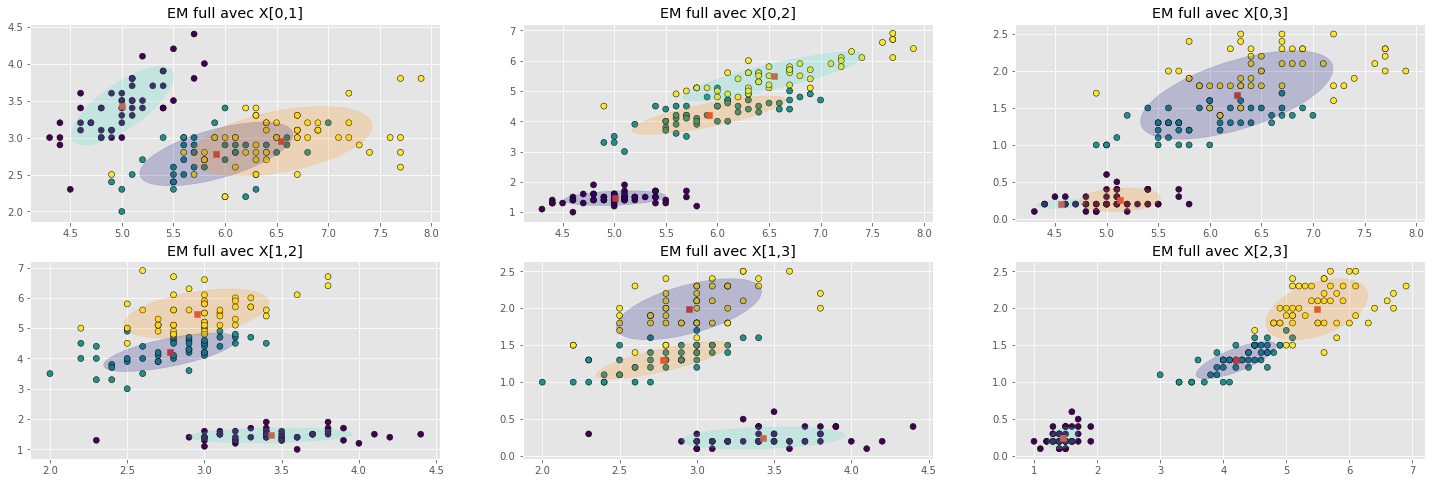

In [13]:
#nb de clusters
t = 3

#coordonées à plot
i = 0
j = 1

#couleurs
color = ['navy', 'turquoise', 'darkorange', 'yellow', 'burlywood']


#couleur ellipse
cluster = color[0:t]


#titres
titles = ['EM full avec X[0,1]', 'EM full avec X[0,2]', 'EM full avec X[0,3]',  'EM full avec X[1,2]', 'EM full avec X[1,3]', 'EM full avec X[2,3]']



#plot
plt.style.use('ggplot')
fig = plt.figure(figsize = (25,8))
for k in range(6):
    
    #création du subplot
    h = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1
    
    #on fait tourner l'algorithme
    mu, sigma, p, labels = EM(X, t)

    #on crée l'ellipse
    make_ellipsesbis(j, i, mu, sigma, cluster, h)
        
    # Plot also the training points
    h.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    h.scatter(mu[:,i], mu[:,j], marker = 's')
    
    h.set_title(titles[k])
    
    j +=1

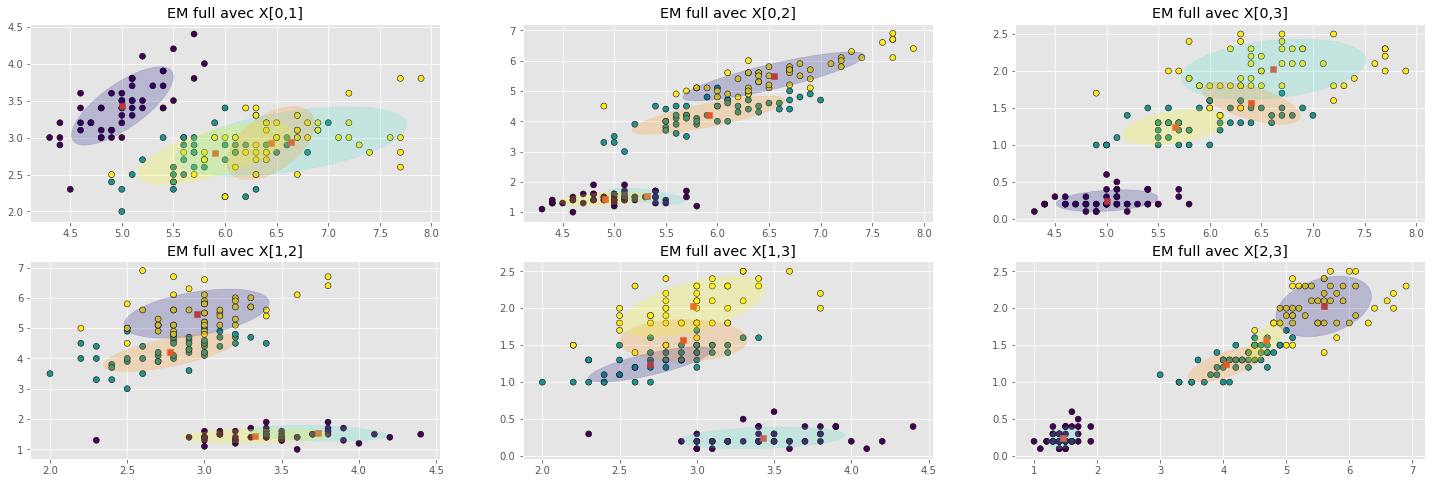

In [14]:
#nb de clusters
t = 4

#coordonées à plot
i = 0
j = 1

#couleurs
color = ['navy', 'turquoise', 'darkorange', 'yellow', 'burlywood']


#couleur ellipse
cluster = color[0:t]


#titres
titles = ['EM full avec X[0,1]', 'EM full avec X[0,2]', 'EM full avec X[0,3]',  'EM full avec X[1,2]', 'EM full avec X[1,3]', 'EM full avec X[2,3]']



#plot
plt.style.use('ggplot')
fig = plt.figure(figsize = (25,8))
for k in range(6):
    
    #création du subplot
    h = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1
    
    #on fait tourner l'algorithme
    mu, sigma, p, labels = EM(X, t)

    #on crée l'ellipse
    make_ellipsesbis(j, i, mu, sigma, cluster, h)

        
    # Plot also the training points
    h.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    h.scatter(mu[:,i], mu[:,j], marker = 's')
    
    h.set_title(titles[k])
    
    j +=1

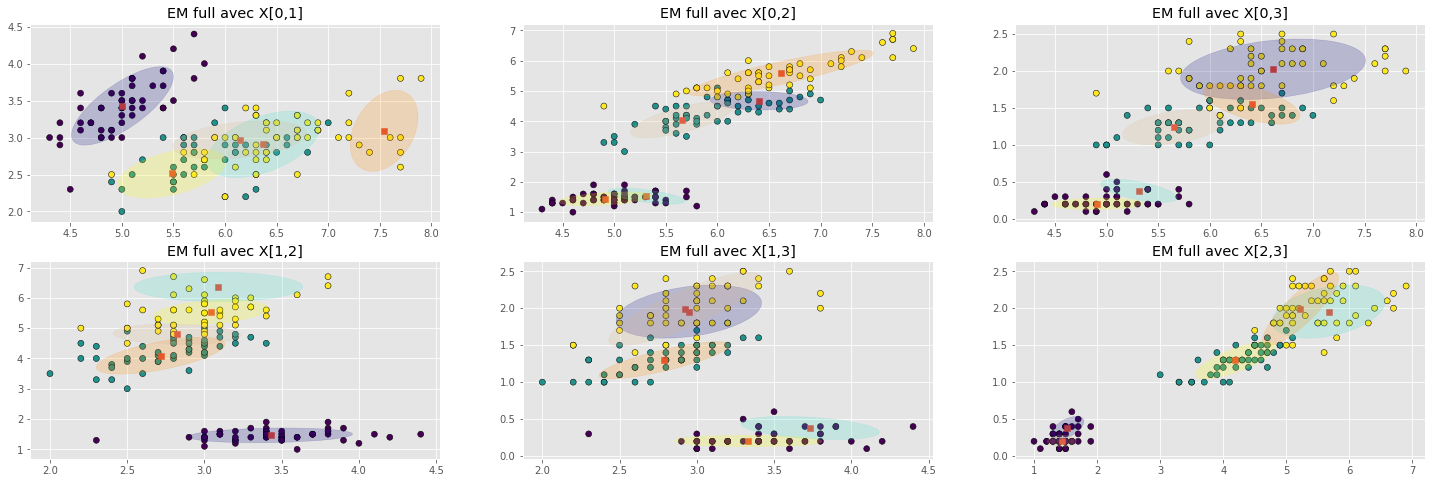

In [16]:
#nb de clusters
t = 5

#coordonées à plot
i = 0
j = 1

#couleurs
color = ['navy', 'turquoise', 'darkorange', 'yellow', 'burlywood']


#couleur ellipse
cluster = color[0:t]


#titres
titles = ['EM full avec X[0,1]', 'EM full avec X[0,2]', 'EM full avec X[0,3]',  'EM full avec X[1,2]', 'EM full avec X[1,3]', 'EM full avec X[2,3]']



#plot
plt.style.use('ggplot')
fig = plt.figure(figsize = (25,8))
for k in range(6):
    
    #création du subplot
    h = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1
    
    #on fait tourner l'algorithme
    mu, sigma, p, labels = EM(X, t)

    #on crée l'ellipse
    make_ellipsesbis(j, i, mu, sigma, cluster, h)

        
    # Plot also the training points
    h.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    h.scatter(mu[:,i], mu[:,j], marker = 's')
    
    h.set_title(titles[k])
    
    j +=1

# EM diagonal, covariance diagonale

In [17]:
def EMdiag(X, k, eps = .001, niter = 100) :
    '''
    Inputs:
    - X les données
    - k le nb de clusters
    
    Outputs : 
    - mu0 : liste d'array représentant les centroïdes
    - sigma0 : listes des matrices de covariance
    - p0 : liste des probas des variables latentes
    - labels : label des données
    
    '''
    n, d = X.shape
    ###initialisation
    mu0, z = kmeans(X, k)                                #on initialise mu avec ce qu'a trouvé l'algorithme des Kmeans
    
    p0 = np.array([len(z[z == i])/n for i in range(k)])  #pk = (nb de données appartenant au cluster k) / (nb de données totale)
    
    #a ce stade, sachant les données, nous connaissons l'assignations des données aux clusters. Donc les probabs valent soient 0 ou 1
    #trouver une meilleure réécriture
    sigma0 =[]
    for l in range(k):
        a = (X[z == l] - mu0[l])
        prod = a * a 
        sigma_k_l = np.sum(prod, axis = 0)
        sigma0.append( np.diag(sigma_k_l) / len(z[z == l]) )


    #loglikelyhood
    numerateur = np.array([p0[l]*multivariate_normal(mu0[l],sigma0[l]).pdf(X) for l in range(k)])
    logold = np.sum(np.log(np.sum(numerateur, axis = 0)))
    
    for i in range(niter):
        
        ###E-step
        
        #tau
        denominateur = np.sum(numerateur, axis = 0)
        tau = denominateur**(-1) * numerateur
        
        ###M-step
        
        #somme sur n des tau_{ik}
        Nl = np.sum(tau, axis = 1)
        
        #nouvelles moyennes
        mu0 = np.array([(tau[l].dot(X))/Nl[l] for l in range(k)])
        
        #nouvelles matrice de covariances 
        sigma0 = []
        for l in range(k):
            a = X - mu0[l]
            prod = a * a
            tau_k = tau[l]
            somme = 0
            for i in range(a.shape[0]):
                somme += tau_k[i] * np.diag(prod[i])
            cov = somme / Nl[l]
            sigma0.append(cov)
        
        
        #nouvelles probas des variables latentes
        p0 = Nl / n
        
        #évaluation
        numerateur = np.array([p0[l]*multivariate_normal(mu0[l],sigma0[l]).pdf(X) for l in range(k)])
        lognew = np.sum(np.log(np.sum(numerateur, axis = 0)))
        
        if np.abs(lognew - logold) < eps : 
            #prédire le label le plus probable pour chaque donnée
            labels = np.argmax(tau, axis = 0)
            
            #print("l'algorithme a convergé en", i, "itérations")
            return(mu0, sigma0, p0, labels)
        
        else : 
            logold = lognew
            
    #prédire le label le plus probable pour chaque donnée
    labels = np.argmax(tau, axis = 0)
    
    print("l'algorithme n'a pas convergé")
    return(mu0, sigma0, p0, labels)

## Plot EM diagonal

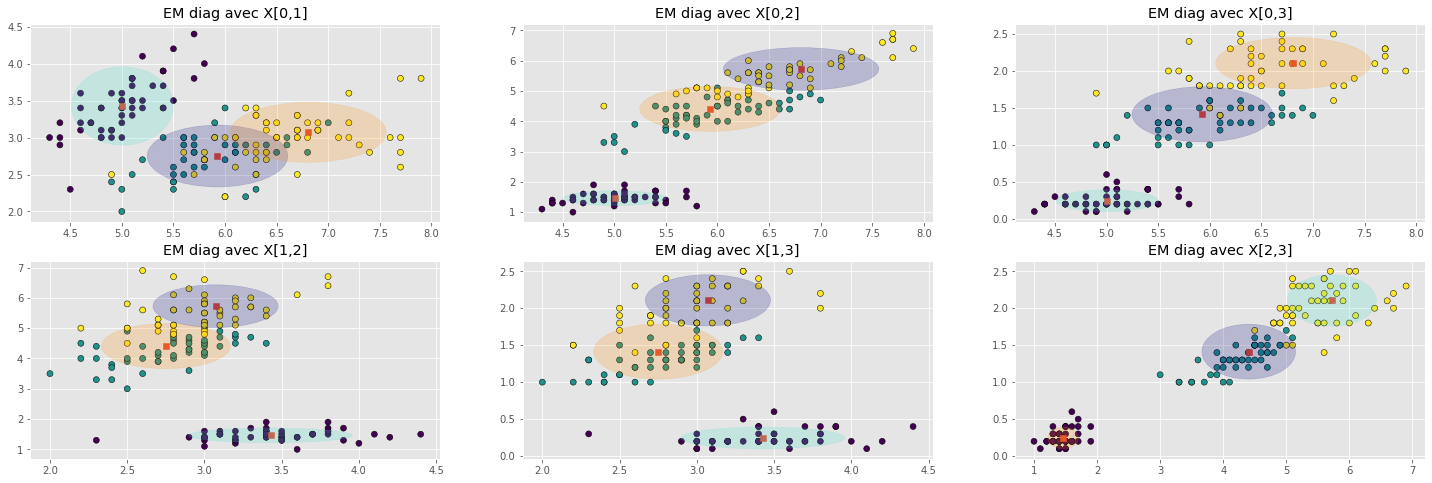

In [18]:
#nb de clusters
t = 3

#coordonées à plot
i = 0
j = 1

#couleurs
color = ['navy', 'turquoise', 'darkorange', 'yellow', 'burlywood']


#couleur ellipse
cluster = color[0:t]


#titres
titles = ['EM diag avec X[0,1]', 'EM diag avec X[0,2]', 'EM diag avec X[0,3]',  'EM diag avec X[1,2]', 'EM diag avec X[1,3]', 'EM diag avec X[2,3]']



#plot
plt.style.use('ggplot')
fig = plt.figure(figsize = (25,8))
for k in range(6):
    
    #création du subplot
    h = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1
    
    #on fait tourner l'algorithme
    mu, sigma, p, labels = EMdiag(X, t)

    #on crée l'ellipse
    make_ellipsesbis(j, i, mu, sigma, cluster, h)

        
    # Plot also the training points
    h.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    h.scatter(mu[:,i], mu[:,j], marker = 's')
    
    h.set_title(titles[k])
    
    j +=1

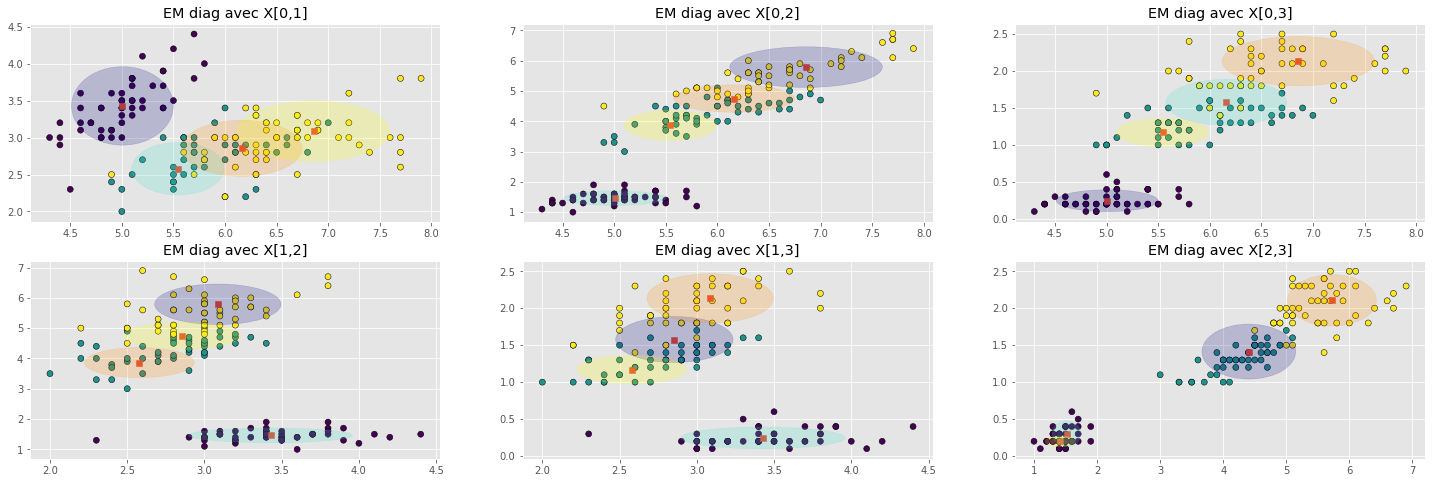

In [19]:
#nb de clusters
t = 4

#coordonées à plot
i = 0
j = 1

#couleurs
color = ['navy', 'turquoise', 'darkorange', 'yellow', 'burlywood']


#couleur ellipse
cluster = color[0:t]


#titres
titles = ['EM diag avec X[0,1]', 'EM diag avec X[0,2]', 'EM diag avec X[0,3]',  'EM diag avec X[1,2]', 'EM diag avec X[1,3]', 'EM diag avec X[2,3]']



#plot
plt.style.use('ggplot')
fig = plt.figure(figsize = (25,8))
for k in range(6):
    
    #création du subplot
    h = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1
    
    #on fait tourner l'algorithme
    mu, sigma, p, labels = EMdiag(X, t)

    #on crée l'ellipse
    make_ellipsesbis(j, i, mu, sigma, cluster, h)
        
    # Plot also the training points
    h.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    h.scatter(mu[:,i], mu[:,j], marker = 's')
    
    h.set_title(titles[k])
    
    j +=1

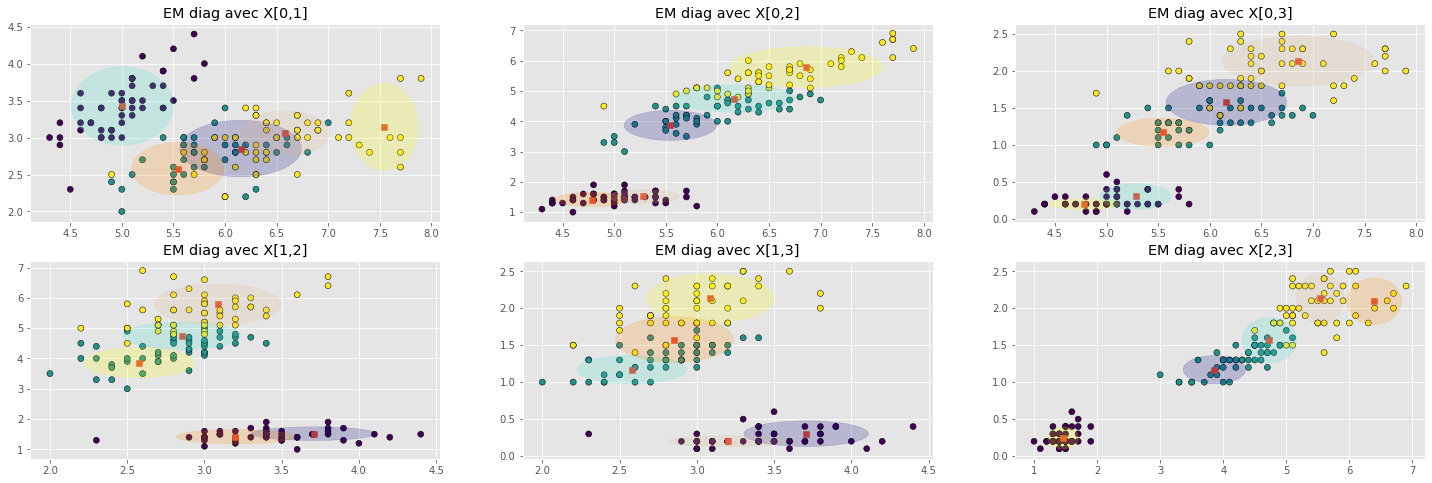

In [20]:
#nb de clusters
t = 5

#coordonées à plot
i = 0
j = 1

#couleurs
color = ['navy', 'turquoise', 'darkorange', 'yellow', 'burlywood']


#couleur ellipse
cluster = color[0:t]


#titres
titles = ['EM diag avec X[0,1]', 'EM diag avec X[0,2]', 'EM diag avec X[0,3]',  'EM diag avec X[1,2]', 'EM diag avec X[1,3]', 'EM diag avec X[2,3]']



#plot
plt.style.use('ggplot')
fig = plt.figure(figsize = (25,8))
for k in range(6):
    
    #création du subplot
    h = fig.add_subplot(2,3,k+1)
    
    if j == 4:
        i += 1
        j = i+1
    
    #on fait tourner l'algorithme
    mu, sigma, p, labels = EMdiag(X, t)

    #on crée l'ellipse
    make_ellipsesbis(j, i, mu, sigma, cluster, h)
        
    # Plot also the training points
    h.scatter(X[:, i], X[:, j], c = y, edgecolor='k')
    h.scatter(mu[:,i], mu[:,j], marker = 's')
    
    h.set_title(titles[k])
    
    j +=1

# Question 4

### on joue sur l'organsation des données. On va volontairement créer une ellipse pour induire en erreur Kmeans

In [192]:
x1 =  np.random.randn(200,2)
y1 = np.random.randn(200, 2) 
y1 /= np.linalg.norm(y1, axis=1, keepdims=True)
y1 = y1 + 0.16 * np.random.randn(200, 2)
y1[:, 0] *= .2    #on réduit la valeur sur l'axe des abscisses pour 
y1[:, 0] += 2     #on décalle l'ellipse
y1[:, 1] *= 3.    #hauteur de l'ellipse

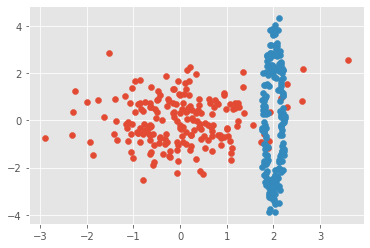

In [193]:
plt.style.use('ggplot')
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(y1[:,0],y1[:,1])
plt.show()

In [194]:
don = np.concatenate((x1, y1))
muK, labelk = kmeans(don, 2)
muEM, sigmaEM, pEM, labelEM = EM(don, 2)

Text(0.5, 1.0, "Centroïde de l'algorithme des Kmeans")

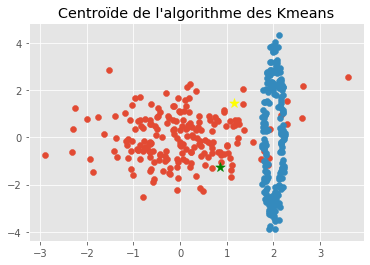

In [195]:
plt.style.use('ggplot')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(y1[:,0], y1[:,1])
plt.scatter(muK[0][0], muK[0][1], marker = '*', s = 100, c = 'green')
plt.scatter(muK[1][0], muK[1][1], marker = '*', s = 100, c = 'yellow')
plt.title("Centroïde de l'algorithme des Kmeans")

Text(0.5, 1.0, "Centroïde de l'algorithme EM avec une covariance full")

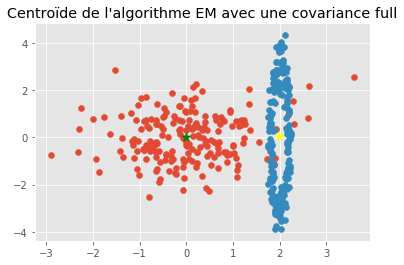

In [196]:
plt.style.use('ggplot')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(y1[:,0], y1[:,1])
plt.scatter(muEM[0][0], muEM[0][1], marker = '*', s = 100, c = 'green' )
plt.scatter(muEM[1][0], muEM[1][1], marker = '*', s = 100, c = 'yellow')
plt.title("Centroïde de l'algorithme EM avec une covariance full")

###  on va superposer une partie de 2 jeux de données différents issus de loi normale pour induire Kmeans en erreur

In [173]:
x2 =  np.random.randn(200,2)
y2 = 2.5 + np.random.randn(2000, 2) 

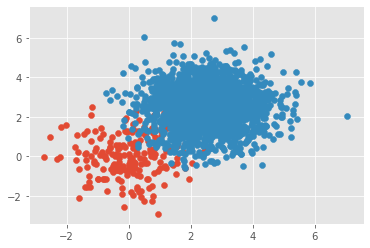

In [174]:
plt.style.use('ggplot')
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(y2[:,0],y2[:,1])
plt.show()

In [198]:
don = np.concatenate((x2, y2))
muK2, labelk2 = kmeans(don, 2)
muEM2, sigmaEM2, pEM2, labelEM2 = EM(don, 2)

Text(0.5, 1.0, "Centroïde de l'algorithme des Kmeans")

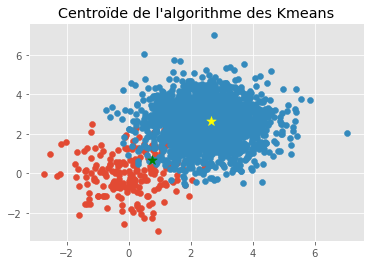

In [199]:
plt.style.use('ggplot')
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(y2[:,0], y2[:,1])
plt.scatter(muK2[0][0], muK2[0][1], marker = '*', s = 100, c = 'green')
plt.scatter(muK2[1][0], muK2[1][1], marker = '*', s = 100, c = 'yellow')
plt.title("Centroïde de l'algorithme des Kmeans")

Text(0.5, 1.0, "Centroïde de l'algorithme EM avec une covariance full")

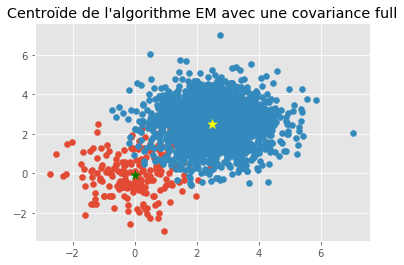

In [189]:
plt.style.use('ggplot')
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(y2[:,0], y2[:,1])
plt.scatter(muEM2[0][0], muEM2[0][1], marker = '*',s = 100, c = 'green')
plt.scatter(muEM2[1][0], muEM2[1][1], marker = '*', s = 100, c = 'yellow')

plt.title("Centroïde de l'algorithme EM avec une covariance full")

# Partie 2: Graphs, algorithms and Ising 

## Question 1

In [186]:
def prod_log_scale(A,x):
    '''
    Permet de calculer sous l'échelle log le produit matricel Ax où A et x déjà en log
    '''
    return logsumexp(A + x, axis=1)

def sum_product(psi, psi_edge, k):
    '''
    Inputs : 
    psi : Liste des valeurs prise par les psi_i (liste d'array)
    psi_edge : liste de N-1 matrices pour passer de l'état i à l'état i-1
    Toutes les valeurs sont considérées en échelle logarithmique
    
    Output : 
    Marginale de p(Xindex) non normalisé
    '''
    
    taille = len(psi)
    
    #on va calculer l'ensemble des messages forward et backward en échelle logarithmique
    forward = 0
    backward = 0
    
    #print("forward =", forward)
    #print("backward =", backward)
                   
    for i in range(k):
        forward  =  prod_log_scale(forward + psi[i], psi_edge[i]) 
        
    for j in range(taille - 1, k, -1):
        backward =  prod_log_scale(backward + psi[j], psi_edge[j-1].T)

        
    return(forward + psi[k] + backward)

## Question 2 

In [187]:
def Ising(beta, w, h):          #comme nous sommes dans le cas alpha = 0, on n'en tient pas compte dans la fonction
    '''
    Inputs:
    -beta : un réel
    - w : un réel décrivant la largeur de la grille
    - h : un réel décrivant la profondeur de la grille
    
    Outputs : 
    - potentiele_log : liste d'array des valeurs prises par les fonctions potentielles de chaque gros noeud
    -potentielle_edge_log : liste de matrice des valeurs prises par les fonctions potentielles connectant chaque noeud
    '''
    #fonction potentielle d'un supernoeud
    shape = (2,)*w
    ndindex = np.ndindex(*shape)
    
    psi_log = np.ones(2**w)       #vecteur où on sotck toutes les combinaisons possibles d'une fonction potentielle d'une chaine
    potentielle_edge_log = []
        
    for i, idx in enumerate(ndindex):
        
        #somme des indicatrices
        somme = 0
        
        for j in range(len(idx) -1):
            
            if idx[j] == idx[j+1]:
                somme += 1
                
        psi_log[i] = beta * somme 
        
    #liste des valeurs prises par toutes les fonctions potentielles du modèle    
    potentielle_log = [psi_log]
    potentielle_log = h * potentielle_log    
    
    
    #fonction potentielle pour passer d'un noeud à un autre
    psi_edge_tree_log = np.empty(2 * shape)
    ndindex_edge = np.ndindex(*psi_edge_tree_log.shape) 

    psi_edge_log = np.ones((2**w)*(2**w))

    for i, idx in enumerate(ndindex_edge):
        #valeurs prises par une chaine (yk)
        idx1 = idx[w:]
    
        #valeurs prises par la chaine suivante (yk+1)
        idx2 = idx[:w]
    
        somme = 0
        for j in range(len(idx1)):
        
            if idx1[j] == idx2[j]:
                somme += 1
            
        psi_edge_log[i] = beta * somme 

    psi_edge_log = psi_edge_log.reshape(1024, 1024).T
    potentielle_edge_log = h * [psi_edge_log]
    
    return potentielle_log, potentielle_edge_log    

## plot

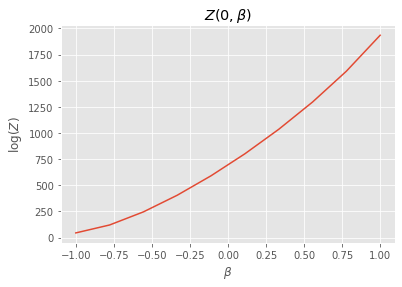

In [188]:
width = 10
height = 100


beta_vals = np.linspace(-1., 1., 10)
logZ_vals = np.empty_like(beta_vals)

for i, beta in enumerate(beta_vals):
    
    psi,psi_edge = Ising(beta, width, height)
    marginal = sum_product(psi,psi_edge,5)
    logZ_vals[i] = logsumexp(marginal)



plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\\log(Z)$")
ax.set_title("$Z(0,\\beta)$")


plt.plot(beta_vals, logZ_vals)


plt.show() 